<a href="https://colab.research.google.com/github/1rd0/cv/blob/main/sklearn_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия

## Лабораторная работа №2


---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО:Рабдел Дмитрий Александрович

Группа:

Вариант:2

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/linreg-1.csv
1. http://labcolor.space/linreg-2.csv

Скопируйте ссылку для своего варианта.

### Импортирование модулей для выполнения работы

In [33]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

In [34]:
# Из соответствующего модуля библиотеки sklearn импортируйте класс нужной модели

#
from sklearn.linear_model import LinearRegression

#

## Чтение данных и краткий анализ

In [35]:
# Используя метод read_csv() из Pandas считайте данные для вашего варианта.


df = pd.read_csv("/content/linreg-2.csv")


In [36]:
# Используя методы describe(), head() просмотрите ваши данные.

#

df.describe()
#

,X,y
count,50.000000,50.000000
mean,36.364100,21.369607
std,16.982718,19.371131
min,-1.175515,-1.708287
25%,27.662211,9.824413
50%,36.201444,19.549988
75%,49.112110,27.144644
max,66.189594,97.625302


In [ ]:
df.head()

,X,y
0,27.270542,27.658164
1,50.827003,8.665420
2,54.765266,6.435308
3,39.892999,16.471261
4,33.835642,19.929357


**Сколько объектов есть в вашем наборе данных?**

Ответ:50

**Сколько и каких признаков у ваших объектов?**

Ответ:2

In [ ]:
df.shape

(50, 2)

## Проверка на отсутствующие значения

Используя метод isnull() датафрейма (df) проверьте есть ли отсутствующие значения в ваших данных.

In [ ]:
#
df.isnull()
#

,X,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


Если в вашем наборе данных есть пропуски, то удалите эти образцы используя метод dropna().

In [ ]:
#
# ваш код
#

**Сколько объектов было удалено?**

Ответ:0

Используя метод pop() разделите ваши зависимые и независимые переменные - X, y

In [37]:
y =  df.pop('y')
X =  df

Далее используя метод train_test_split() разделите данные на обучающую и проверочную части. В тестовую часть выделите 20% ваши данных и укажите random_state для воспроизводимости вашего результата.

In [38]:
#
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
#

## Обучение без обработки

In [40]:
# Создайте объект модели линейной регрессии

regr =  LinearRegression()# спользуйте класс LinearRegression

# Обучите модель с использованием обучающего набора

regr.fit(X_train,y_train)  # ваш код

# Сделайте прогноз используя полученную модель

y_pred = regr.predict(X_test)  # ваш код

**Сколько параметров в вашей модели линейной регрессии?**

Ваш ответ:2

Сравните спрогнозированные значения с тестовыми с помощью средней квадратичной ошибки и коэффициент детерминации.

In [41]:

#показывает, насколько хорошо модель соответствует данным.

print(f"Средняя квадратичная ошибка {mean_squared_error(y_test, y_pred):.2f}")
print(f"Коэффициент детерминации {r2_score(y_test, y_pred):.2f}")

Средняя квадратичная ошибка 36.05
Коэффициент детерминации 0.71


Визуализация результатов.

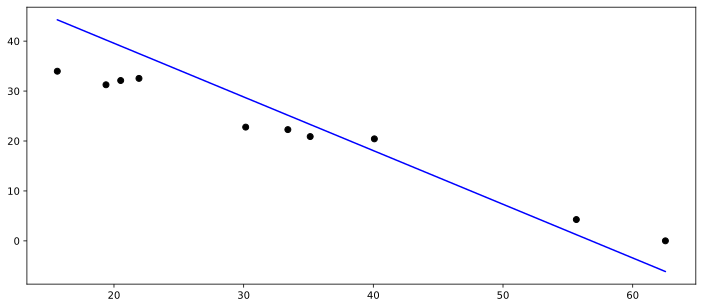

In [42]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue")

## Удаление выбросов

Для удаления выбросов воспользуемся z-оценкой.

$z_i = \frac{x_i - \mu}{\sigma}$, где

$\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [56]:
# Используя метод read_csv() из Pandas повторно считайте данные для вашего варианта.

#
df =pd.read_csv('/content/linreg-2.csv')

С помощью np.mean() и np.std() рассчитайте $\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [57]:
mean = np.mean(df['y'] )
std = np.std(df['y'] )

Добавляем к нашим данным новую колонку z-score.

In [58]:
df["z-score"] = df.apply(lambda x: (x['y'] - mean) / std, axis=1)

In [ ]:
df.head()

,X,y,z-score
0,27.270542,27.658164,0.327931
1,50.827003,8.665420,-0.662489
2,54.765266,6.435308,-0.778784
3,39.892999,16.471261,-0.255436
4,33.835642,19.929357,-0.075105


**Опишите что такое lambda в python**

Ваш ответ:анонимная функция

Если z-оценка больше +3 или меньше -3, то данное значение считаем выбросом и удаляем его из наших данных.

In [59]:
df = df.loc[(df['z-score'] <= 3) & (df['z-score'] >= -3)]

In [49]:
df.describe()

,X,y,z-score
count,48.000000,48.000000,48.000000
mean,37.920430,18.221288,-0.164176
std,15.454501,11.752346,0.612853
min,-0.897306,-1.708287,-1.203450
25%,28.870124,9.050998,-0.642382
50%,37.995909,18.999822,-0.123578
75%,50.334657,25.337447,0.206912
max,66.189594,46.989061,1.335986


**В чем заключается идея z-оценки и что подразумевает диапазон от -3 до 3?**

Ваш ответ:Идея z-оценки - на сколько отклоняется определенное значение от среднего значения
Диапазон от -3 до 3 - 3 стандартных отклонений от среднего значения

**Сколько значений было удалено как выбросы?**

Ваш ответ:2

## Обучение после обработки

In [61]:
# Создайте объект модели линейной регрессии
df.pop('z-score')
# ваш код
y=df.pop('y')
X=df
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
# Обучите модель с использованием обучающего набора
model = LinearRegression()
model.fit(X_train,y_train)
predict=model.predict(X_test)
model.



KeyError: ignored

Как и в разделе обучение без обработки оцените модель регрессии по средней квадратичной ошибке и коэффициенту детерминации.

In [51]:
print(f"Средняя квадратичная ошибка {mean_squared_error(y_test, predict):.2f}")
print(f"Коэффициент детерминации {r2_score(y_test, predict):.2f}")

Средняя квадратичная ошибка 1.44
Коэффициент детерминации 0.98


Визуализируйте результат.

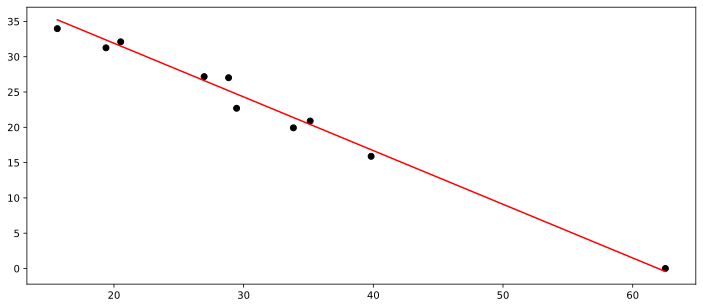

In [52]:
#
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,predict,color='red')
#

Сравните результаты до работы с выбросами и после.

**Как изменились результаты работы модели после удаления выбросов?**

Ваш ответ:Квадратичная ошибка уменьшилась, коэффициент детерминации вырос, соответственно наша модель работает лучше

**Опишите идею метода наименьших квадратов.**

Ваш ответ:заключается в минимизации суммы квадратов отклонений наблюдаемых значений зависимой переменной от значений, предсказанных моделью